In [31]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [32]:
df = pd.read_csv('cleaned_data.csv', index_col=[0])

In [33]:
def classify_time(time):
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to each time column
df['SubscriptionTimeCategory'] = df['SubscriptionTime'].apply(lambda x: classify_time(datetime.strptime(x, "%H:%M:%S").time()))
df['RenewalTimeCategory'] = df['RenewalTime'].apply(lambda x: classify_time(datetime.strptime(x, "%H:%M:%S").time()))

# Display the DataFrame with the new columns
print(df[['SubscriptionTime', 'SubscriptionTimeCategory', 'RenewalTime', 'RenewalTimeCategory']])

       SubscriptionTime SubscriptionTimeCategory RenewalTime  \
200000         00:09:00                    Night    00:09:00   
2              14:02:00                Afternoon    00:00:00   
205756         20:48:00                  Evening    20:48:00   
287235         09:18:00                  Morning    09:18:00   
353431         21:24:00                    Night    21:24:00   
...                 ...                      ...         ...   
348415         16:37:00                Afternoon    07:00:00   
344804         12:24:00                Afternoon    07:00:00   
340799         13:20:00                Afternoon    07:00:00   
341650         09:36:00                  Morning    07:00:00   
348390         11:38:00                  Morning    07:00:00   

       RenewalTimeCategory  
200000               Night  
2                    Night  
205756             Evening  
287235             Morning  
353431               Night  
...                    ...  
348415             Morning  

In [34]:
# Replacing Subscription and Renewal Time Category to int
df['SubscriptionTimeCategory'] = df['SubscriptionTimeCategory'].str.replace('Morning','0')
df['SubscriptionTimeCategory'] = df['SubscriptionTimeCategory'].str.replace('Afternoon','1')
df['SubscriptionTimeCategory'] = df['SubscriptionTimeCategory'].str.replace('Evening','2')
df['SubscriptionTimeCategory'] = df['SubscriptionTimeCategory'].str.replace('Night','3')
df['SubscriptionTimeCategory'] = df['SubscriptionTimeCategory'].astype('int')

In [35]:
# Replacing Subscription and Renewal Time Category to int
df['RenewalTimeCategory'] = df['RenewalTimeCategory'].str.replace('Morning','0')
df['RenewalTimeCategory'] = df['RenewalTimeCategory'].str.replace('Afternoon','1')
df['RenewalTimeCategory'] = df['RenewalTimeCategory'].str.replace('Evening','2')
df['RenewalTimeCategory'] = df['RenewalTimeCategory'].str.replace('Night','3')
df['RenewalTimeCategory'] = df['RenewalTimeCategory'].astype('int')

In [36]:
# Convert 'subs_date' column to datetime format if it's not already in datetime64 format
df['SubscriptionDate'] = pd.to_datetime(df['SubscriptionDate'])

# Extract year, month, and day as separate numerical features
df['SubscriptionYear'] = df['SubscriptionDate'].dt.year
df['SubscriptionMonth'] = df['SubscriptionDate'].dt.month
df['SubscriptionDay'] = df['SubscriptionDate'].dt.day
df['SubscriptionHour'] = df['SubscriptionDate'].dt.hour
df['SubscriptionMinute'] = df['SubscriptionDate'].dt.minute
df['SubscriptionSecond'] = df['SubscriptionDate'].dt.second

In [37]:
# Convert 'subs_date' column to datetime format if it's not already in datetime64 format
df['RenewalDate'] = pd.to_datetime(df['RenewalDate'])

# Extract year, month, and day as separate numerical features
df['RenewalYear'] = df['RenewalDate'].dt.year
df['RenewalMonth'] = df['RenewalDate'].dt.month
df['RenewalDay'] = df['RenewalDate'].dt.day
df['RenewalHour'] = df['RenewalDate'].dt.hour
df['RenewalMinute'] = df['RenewalDate'].dt.minute
df['RenewalSecond'] = df['RenewalDate'].dt.second

In [38]:
label_encoder = LabelEncoder()
columns_to_encode = ['CountryCode', 'OperatorName', 'ServiceType', 'SubscriptionChannel', 
                    'SubscriptionCycle', 'AdnetName', 'PublisherName']

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

df['SuccessLabel'] = df['SuccessCharging'] > 0

# df_encoded = pd.get_dummies(df, columns=columns_to_encode)

# features_encoded = df_encoded.drop(['SuccessCharging', 'SuccessLabel', 'SubscriptionDate','SubscriptionHour', 'SubscriptionMinute', 
#                                     'SubscriptionSecond', 'RenewalDate', 'RenewalHour', 'RenewalMinute', 'RenewalSecond',
#                                     'SubscriptionTime', 'RenewalTime', 'AdnetName', 'PublisherName', 'SubscriptionChannel'], axis=1) 
# target_encoded = df_encoded['SuccessLabel'] 


features = ['OperatorName', 'ServiceType', 'SubscriptionChannel', 
            'CustomerStatus', 'SubscriptionCycle', 'AdnetName', 'PublisherName',
            'ChargingAttempts', 'SubscriptionYear', 'SubscriptionMonth', 'SubscriptionDay', 
            'RenewalYear', 'RenewalMonth', 'RenewalDay', 'SubscriptionTimeCategory', 
            'RenewalTimeCategory']
target = 'SuccessLabel'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Train the Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_clf.predict(X_test)

# Convert y_test to float if not already
y_test = y_test.astype('float64')

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", classification_rep_dt)

Decision Tree Accuracy: 0.9206744991970248
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.95     51360
         1.0       0.92      0.78      0.84     19626

    accuracy                           0.92     70986
   macro avg       0.92      0.88      0.90     70986
weighted avg       0.92      0.92      0.92     70986



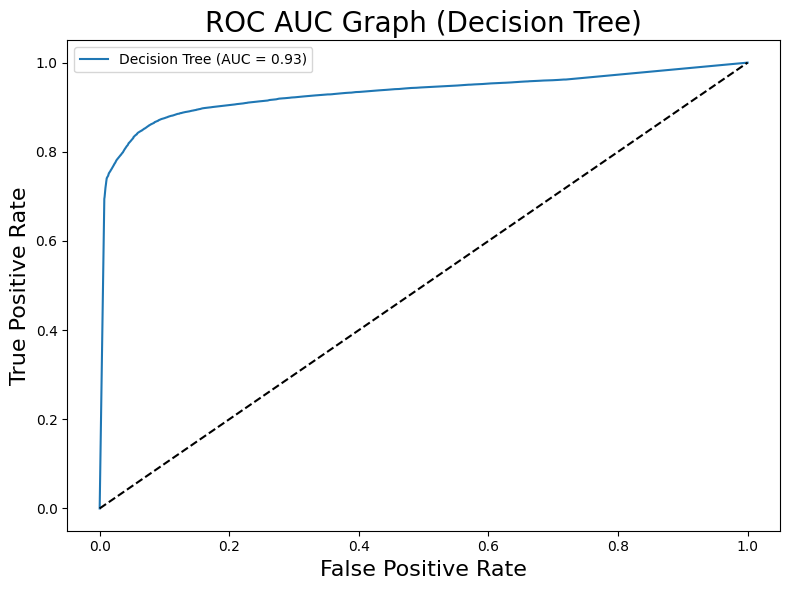

In [40]:
# Get the predicted probabilities for the positive class
y_probs_dt = dt_clf.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc_dt = roc_auc_score(y_test, y_probs_dt)

# Get the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_dt)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC AUC Graph (Decision Tree)', fontsize=20)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent cropping
plt.show()

ChargingAttempts: 0.47191747584276694
RenewalDay: 0.19054000623807021
RenewalMonth: 0.12890921695519103
RenewalTimeCategory: 0.09625184951297681
SubscriptionDay: 0.05907018067116917
SubscriptionMonth: 0.022993001250249688
SubscriptionTimeCategory: 0.014442403008946834
SubscriptionYear: 0.009054828310944243
RenewalYear: 0.006821038209685261


/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_70411/1836786335.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances_dt, y=sorted_features_dt, palette="viridis")


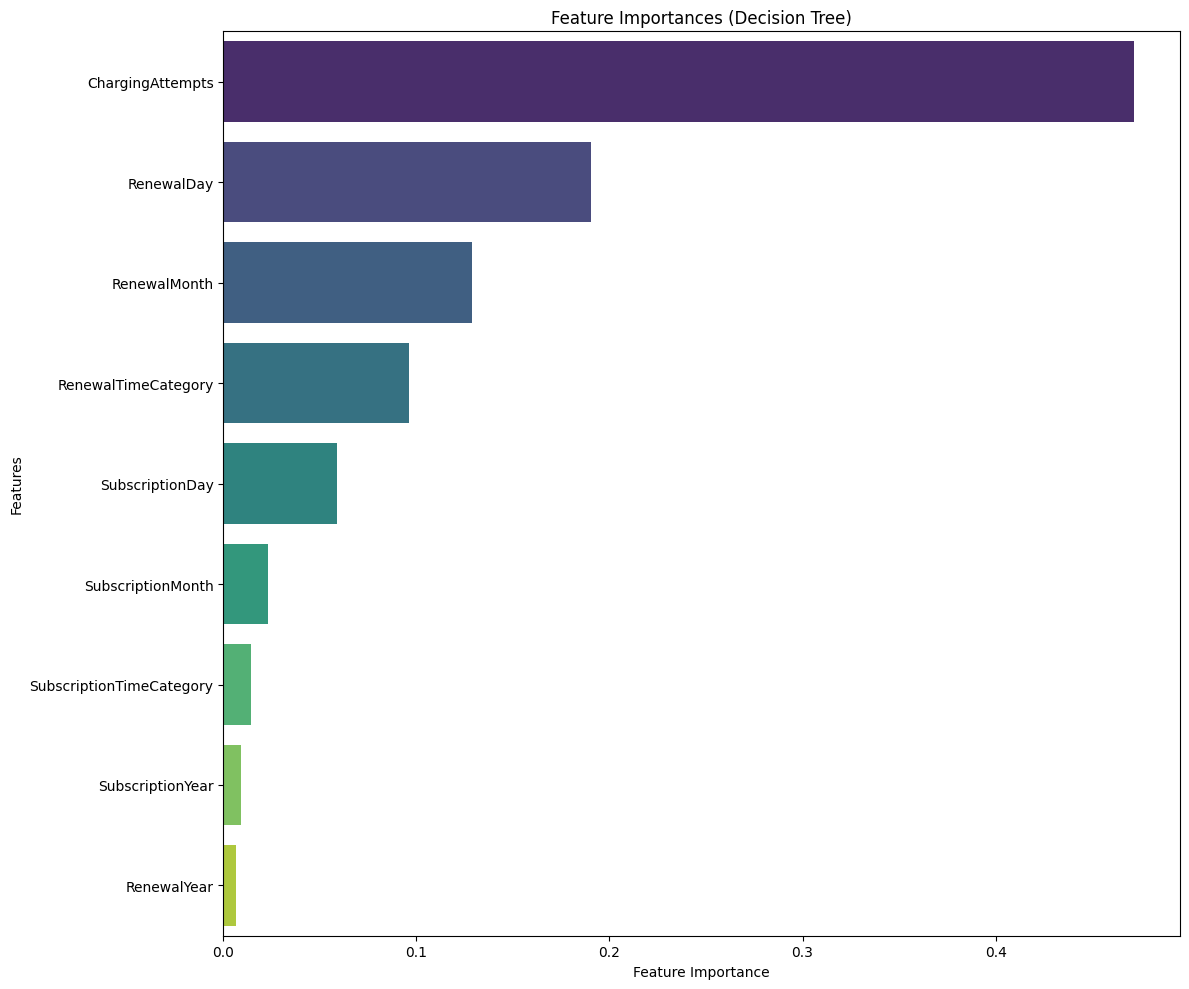

In [41]:
# Get feature importances
feature_importances_dt = dt_clf.feature_importances_
feature_names_dt = X.columns

# Sort indices and features based on importances
sorted_indices_dt = feature_importances_dt.argsort()[::-1]
sorted_features_dt = [feature_names_dt[i] for i in sorted_indices_dt]
sorted_importances_dt = [feature_importances_dt[i] for i in sorted_indices_dt]

# Print sorted feature importances
for feature, importance in zip(sorted_features_dt, sorted_importances_dt):
    print(f'{feature}: {importance}')

# Plotting sorted feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x=sorted_importances_dt, y=sorted_features_dt, palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Decision Tree)')
plt.tight_layout()  # Adjust layout to prevent cropping
plt.show()

In [42]:
from xgboost import XGBClassifier

# Train the XGBoost model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
classification_rep = classification_report(y_test, y_pred_xgb)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9162370044797565
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     51360
         1.0       0.92      0.77      0.83     19626

    accuracy                           0.92     70986
   macro avg       0.92      0.87      0.89     70986
weighted avg       0.92      0.92      0.91     70986



In [ ]:
# Assuming 'X' is the feature matrix used in the XGBoost model
correlation_matrix = X.corr()

# Plotting the correlation matrix as a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix for XGBoost Features')
plt.tight_layout()  # Adjust layout to prevent cropping
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_probs_xgb = xgb.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc_xgb = roc_auc_score(y_test, y_probs_xgb)

# Get the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_xgb)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC AUC Graph (Decision Tree)', fontsize=20)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent cropping
plt.show()

SubscriptionYear: 0.35929062962532043
RenewalYear: 0.1511327177286148
ChargingAttempts: 0.14731203019618988
RenewalMonth: 0.11643930524587631
RenewalTimeCategory: 0.1070774495601654
RenewalDay: 0.08050380647182465
SubscriptionMonth: 0.022480739280581474
SubscriptionDay: 0.010148521512746811
SubscriptionTimeCategory: 0.005614809691905975


/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_70411/2383565316.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=sorted_features, palette="viridis")


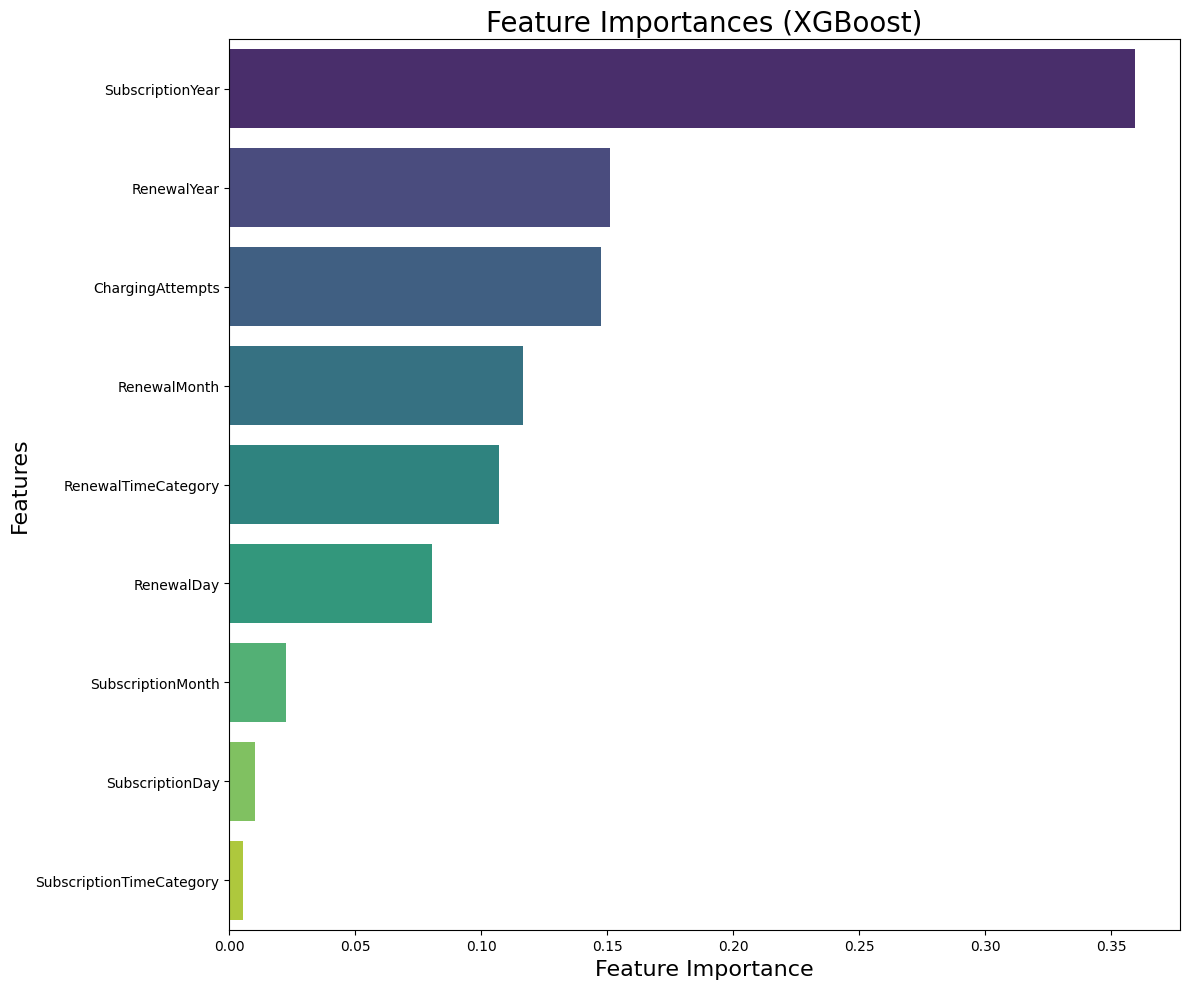

In [43]:
feature_importances = xgb.feature_importances_
sorted_indices = sorted(range(len(feature_importances)), key=lambda k: feature_importances[k], reverse=True)
sorted_features = [X.columns[i] for i in sorted_indices]
sorted_importances = [feature_importances[i] for i in sorted_indices]

# Print sorted feature importances
for feature, importance in zip(sorted_features, sorted_importances):
    print(f'{feature}: {importance}')

# Plotting sorted feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x=sorted_importances, y=sorted_features, palette="viridis")
plt.xlabel('Feature Importance', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.title('Feature Importances (XGBoost)', fontsize=20)
plt.tight_layout()  # Add this line to adjust layout
plt.show()

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
classification_rep = classification_report(y_test, y_pred_rf)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9221114022483307
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.95     51360
         1.0       0.92      0.79      0.85     19626

    accuracy                           0.92     70986
   macro avg       0.92      0.88      0.90     70986
weighted avg       0.92      0.92      0.92     70986



In [ ]:
# Get the predicted probabilities for the positive class
y_probs_rf = rf.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc_rf = roc_auc_score(y_test, y_probs_rf)

# Get the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_rf)

# Plot the ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend()
plt.tight_layout()  # Adjust layout to prevent cropping
plt.show()

ChargingAttempts: 0.35552163950855603
SubscriptionYear: 0.14014118553207386
RenewalDay: 0.13856630723469288
RenewalMonth: 0.1070904526292912
RenewalTimeCategory: 0.1021376676339678
SubscriptionDay: 0.07161351879117865
SubscriptionMonth: 0.054917509713557904
SubscriptionTimeCategory: 0.022690569004363885
RenewalYear: 0.007321149952317918


/var/folders/dw/l4h116bs0p1614knym74hj4m0000gn/T/ipykernel_70411/816803075.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances, y=sorted_features, palette="viridis")


FileNotFoundError: [Errno 2] No such file or directory: '/content/randomfeatures.png'

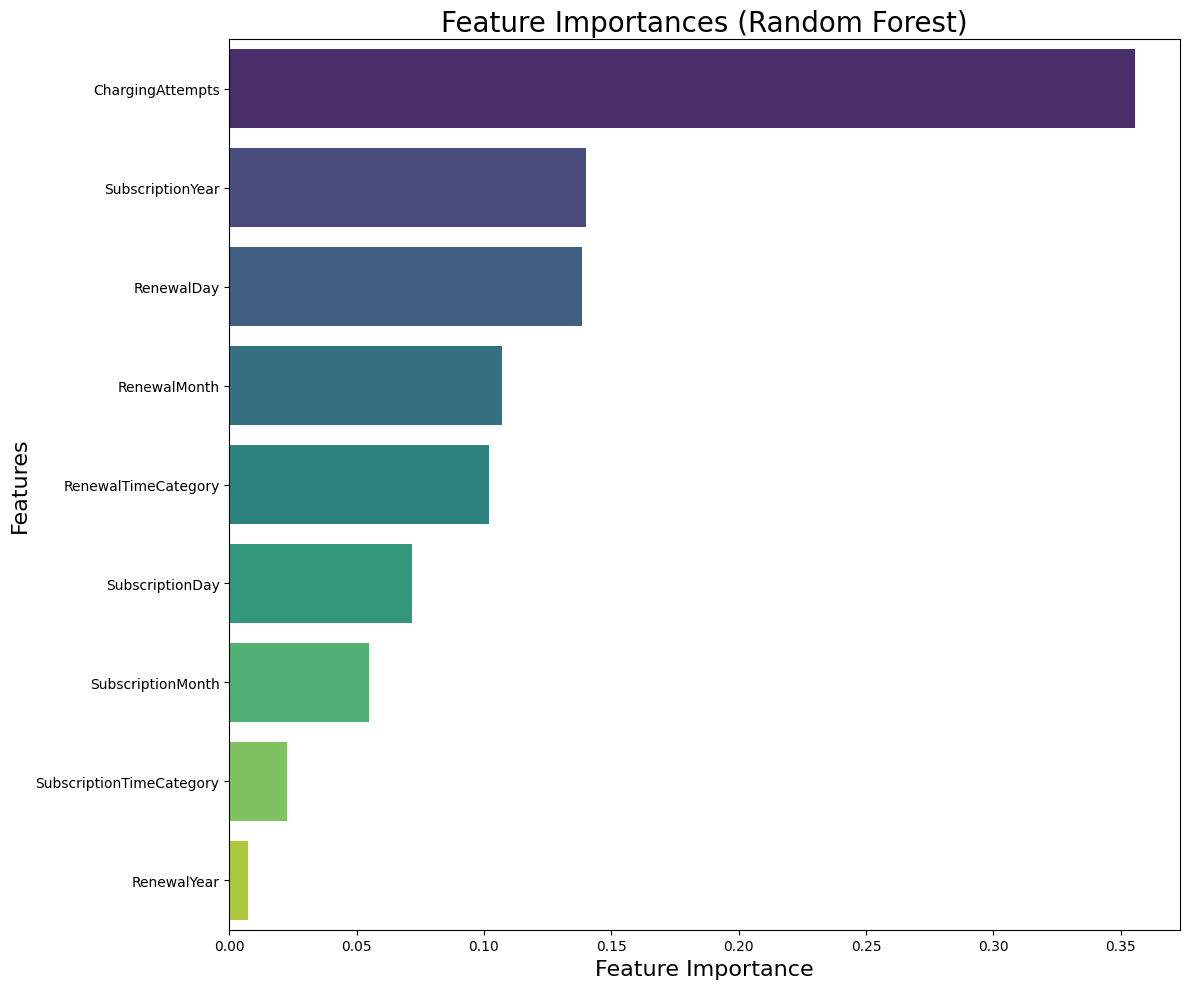

In [45]:
# Assuming clf is your trained RandomForest model
feature_importances = rf.feature_importances_
sorted_indices = sorted(range(len(feature_importances)), key=lambda k: feature_importances[k], reverse=True)
sorted_features = [X.columns[i] for i in sorted_indices]
sorted_importances = [feature_importances[i] for i in sorted_indices]

# Print sorted feature importances
for feature, importance in zip(sorted_features, sorted_importances):
    print(f'{feature}: {importance}')

# Plotting sorted feature importances
plt.figure(figsize=(12, 10))
sns.barplot(x=sorted_importances, y=sorted_features, palette="viridis")
plt.xlabel('Feature Importance', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.title('Feature Importances (Random Forest)', fontsize=20)
plt.tight_layout()  # Adjust layout to prevent cropping
plt.show()

In [47]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
log = LogisticRegression(random_state=42)
log.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = log.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log)
classification_rep = classification_report(y_test, y_pred_log)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7942692925365565
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.92      0.87     51360
         1.0       0.69      0.47      0.56     19626

    accuracy                           0.79     70986
   macro avg       0.75      0.69      0.71     70986
weighted avg       0.78      0.79      0.78     70986



FileNotFoundError: [Errno 2] No such file or directory: '/content/histfeaturelogisticroc.png'

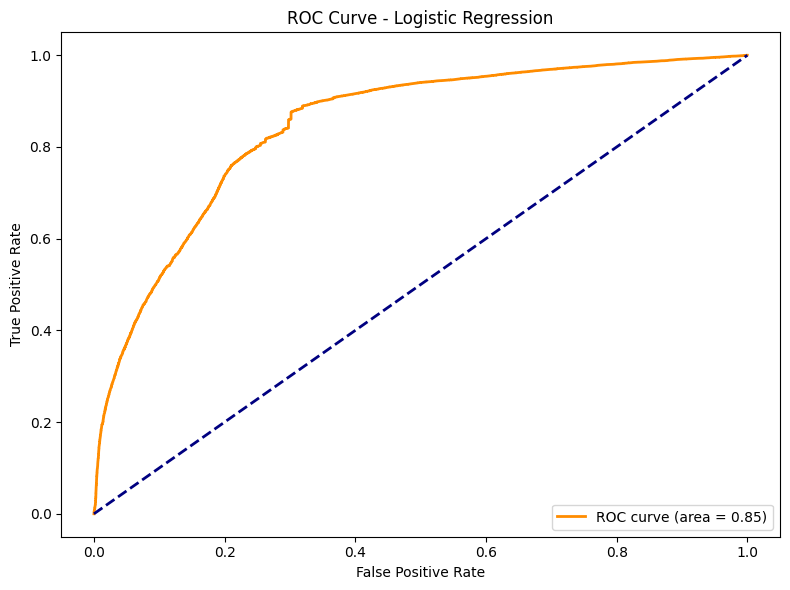

In [48]:
# Get the predicted probabilities for the positive class
y_prob_log = log.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_log)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.tight_layout()  # Adjust layout to prevent cropping

print("ROC AUC Score:", roc_auc)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

# Train the K Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
classification_rep = classification_report(y_test, y_pred_knn)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9122221283069901
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     51360
         1.0       0.89      0.77      0.83     19626

    accuracy                           0.91     70986
   macro avg       0.91      0.87      0.89     70986
weighted avg       0.91      0.91      0.91     70986



In [ ]:
# Get the predicted probabilities for the positive class
y_prob_knn = knn.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_knn)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K Nearest Neighbors')
plt.legend(loc='lower right')
plt.tight_layout()  # Adjust layout to prevent cropping
plt.show()

print("ROC AUC Score:", roc_auc)